<a href="https://colab.research.google.com/github/amoakoh22/Forex-Pairs-Correlation-Analysis/blob/main/xauusd_vs_forex_pairs_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[*********************100%***********************]  7 of 7 completed


Correlation Matrix:
          XAUUSD    EURUSD    USDCAD    GBPUSD       DXY    AUDUSD    BTCUSD
XAUUSD  1.000000  0.042763 -0.038223  0.692757  0.716567  0.043332 -0.747965
EURUSD  0.042763  1.000000 -0.074071  0.063136  0.080283  0.075697 -0.037091
USDCAD -0.038223 -0.074071  1.000000 -0.030661 -0.047867 -0.419664  0.007976
GBPUSD  0.692757  0.063136 -0.030661  1.000000  0.806778  0.030622 -0.561028
DXY     0.716567  0.080283 -0.047867  0.806778  1.000000  0.045309 -0.582648
AUDUSD  0.043332  0.075697 -0.419664  0.030622  0.045309  1.000000  0.003654
BTCUSD -0.747965 -0.037091  0.007976 -0.561028 -0.582648  0.003654  1.000000


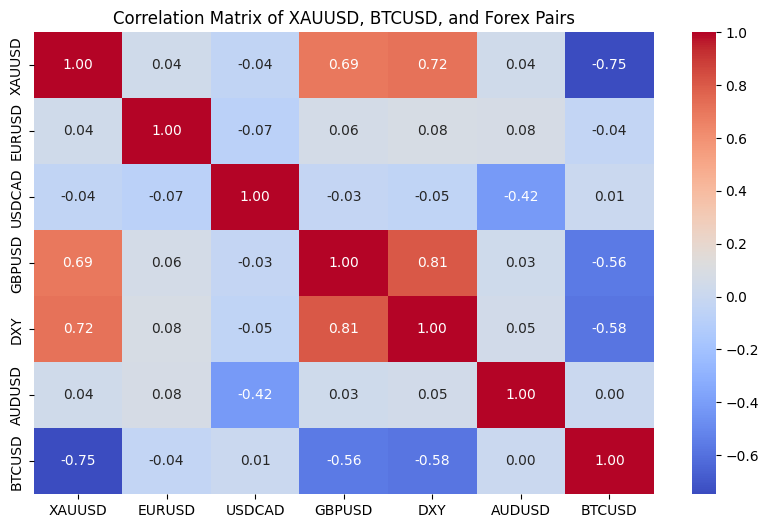

In [59]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf  # Yahoo Finance API
import datetime

# Define symbols for the financial instruments
symbols = {
    "XAUUSD": "GC=F",  # Gold Futures
    "EURUSD": "EURUSD=X",
    "USDCAD": "USDCAD=X",
    "GBPUSD": "GBPUSD=X",
    "DXY": "DX-Y.NYB",  # U.S. Dollar Index
    "AUDUSD": "AUDUSD=X",  # Australian Dollar to US Dollar
    "BTCUSD": "BTC-USD"  # Bitcoin to US Dollar
}

# Calculate yesterday's date
yesterday = datetime.date.today() - datetime.timedelta(days=1)
yesterday_str = yesterday.strftime("%Y-%m-%d")  # Example: 2024-12-10

# Fetch historical data
df = yf.download(list(symbols.values()), start="2023-01-01", end=yesterday_str)['Adj Close']
df.columns = symbols.keys()  # Rename columns for clarity

# Drop rows with missing values
df.dropna(inplace=True)

# Calculate daily percentage returns
returns = df.pct_change().dropna()

# Compute and display the correlation matrix
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of XAUUSD, BTCUSD, and Forex Pairs")
plt.show()


In [60]:
# Compute rolling correlations with XAUUSD (30-day window)
rolling_corr = returns.rolling(window=30).corr(returns['XAUUSD'])

In [61]:
print(rolling_corr.tail())
#displaying the last rows of the rolling_corr DataFrame

            XAUUSD    EURUSD    USDCAD    GBPUSD       DXY    AUDUSD    BTCUSD
Date                                                                          
2024-12-03     1.0 -0.255255  0.178350  0.720538  0.736324 -0.116584 -0.847029
2024-12-04     1.0 -0.233281  0.160880  0.739015  0.743936 -0.088094 -0.840184
2024-12-05     1.0 -0.186297  0.178834  0.722495  0.693533 -0.033922 -0.828759
2024-12-06     1.0 -0.171668  0.183571  0.726062  0.704132 -0.026142 -0.830538
2024-12-09     1.0 -0.116963  0.172975  0.718639  0.694794 -0.054378 -0.824866


In [63]:
# Define currency pairs for each plot group
group1_currencies = ['EURUSD', 'USDCAD', 'GBPUSD']
group2_currencies = ['DXY', 'AUDUSD', 'BTCUSD']

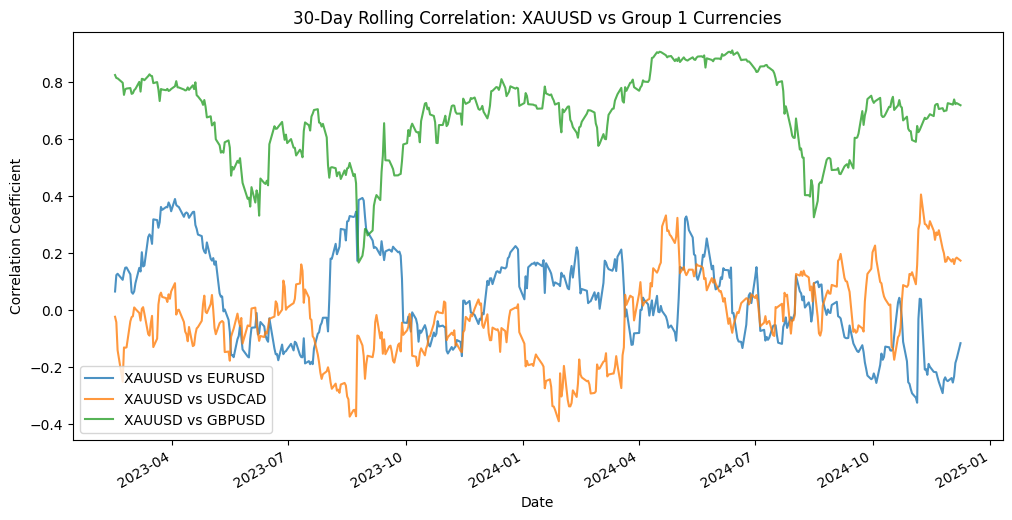

In [64]:
# Plot rolling correlations for group 1
plt.figure(figsize=(12, 6))  # Create a figure for group 1
for column in group1_currencies:
    rolling_corr[column].plot(label=f'XAUUSD vs {column}', alpha=0.8)
plt.legend()
plt.title("30-Day Rolling Correlation: XAUUSD vs Group 1 Currencies")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Date")
plt.show()  # Display group 1 plot

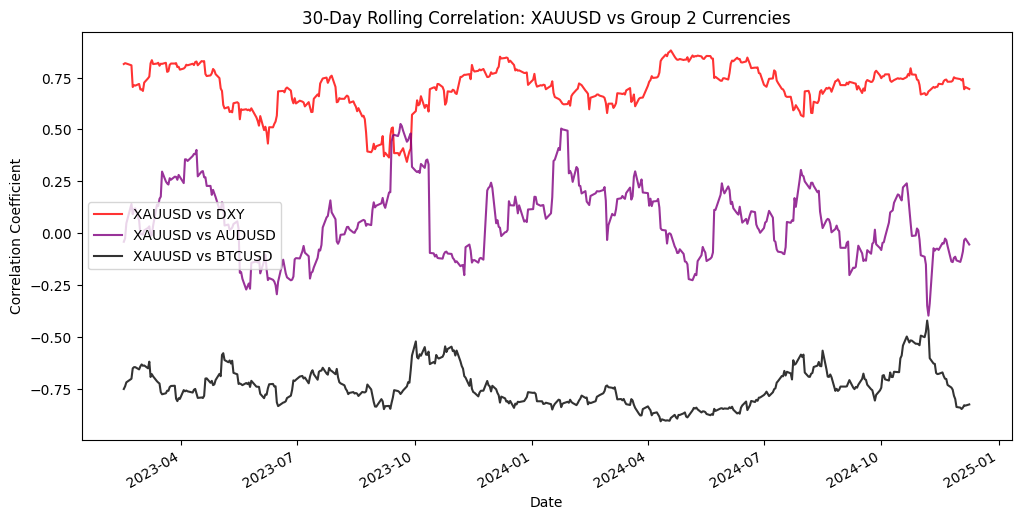

In [69]:
# Plot rolling correlations for group 2
plt.figure(figsize=(12, 6))  # Create a figure for group 2
# Define a list of colors for the lines, excluding orange
colors = ['red', 'purple', 'black']  # You can choose any colors you like

for i, column in enumerate(group2_currencies):
    rolling_corr[column].plot(label=f'XAUUSD vs {column}', alpha=0.8, color=colors[i])
plt.legend()
plt.title("30-Day Rolling Correlation: XAUUSD vs Group 2 Currencies")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Date")
plt.show()  # Display group 2 plot

Initial Data preprocessing shown that the plot was too cluttered, this division into two separate plots should make the visualization less cluttered and easier to interpret

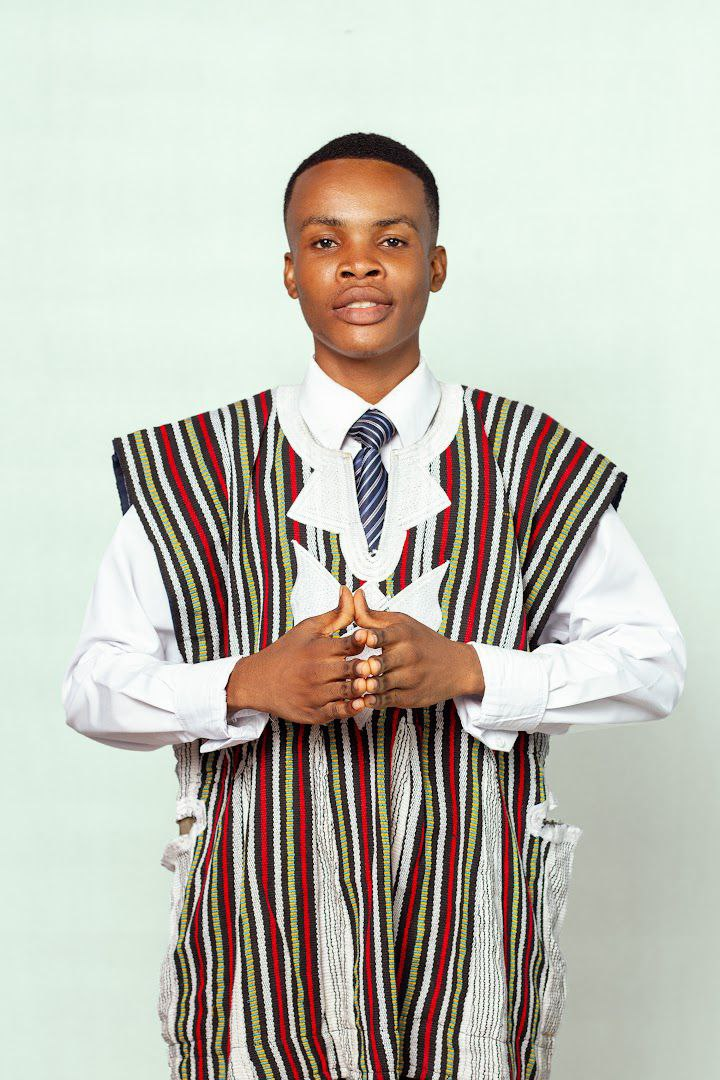

In [58]:
from IPython.display import Image, display

# Path to your image file in Google Drive
image_path = '/content/drive/MyDrive/officialpic.jpg'

try:
    display(Image(image_path))
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")